In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the Iris dataset
def load_and_prepare_data():
    iris = load_iris()
    X = iris.data  # Features
    y = iris.target  # Target labels
    
    # One-hot encode the target labels
    y_onehot = tf.keras.utils.to_categorical(y, num_classes=3)
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [3]:
# Load data
X_train, X_test, y_train, y_test = load_and_prepare_data()

# Define a model with L2 regularization (weights in the loss function)
def create_model_with_regularization(input_dim, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,),
                              kernel_regularizer=l2(0.01)),  # L2 Regularization (penalizes large weights)
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

In [4]:
# Create the model
input_dim = X_train.shape[1]
num_classes = y_train.shape[1]
model = create_model_with_regularization(input_dim, num_classes)

C:\Users\Owner\.ai-navigator\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Includes the L2 penalty term automatically
    metrics=['accuracy']
)

In [6]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3173 - loss: 1.5272 - val_accuracy: 0.5714 - val_loss: 1.4361
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6132 - loss: 1.3987 - val_accuracy: 0.6667 - val_loss: 1.3248
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7634 - loss: 1.2757 - val_accuracy: 0.7143 - val_loss: 1.2392
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7422 - loss: 1.1767 - val_accuracy: 0.7619 - val_loss: 1.1633
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8041 - loss: 1.1000 - val_accuracy: 0.8095 - val_loss: 1.0925
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7960 - loss: 1.0340 - val_accuracy: 0.8095 - val_loss: 1.0281
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8592 - loss: 0.9557 - val_accuracy: 0.8095 - val_loss: 0.9672
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9139 - loss: 0.8853 - val_accuracy: 0.8571 - val_loss: 0.9125


In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (including regularization): {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss (including regularization): 0.3652
Test Accuracy: 0.9333


In [8]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,499 (29.30 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,000 (19.54 KB)

In [9]:
# Visualize Training and Validation Loss
def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss with L2 Regularization')
    plt.legend()
    plt.show()

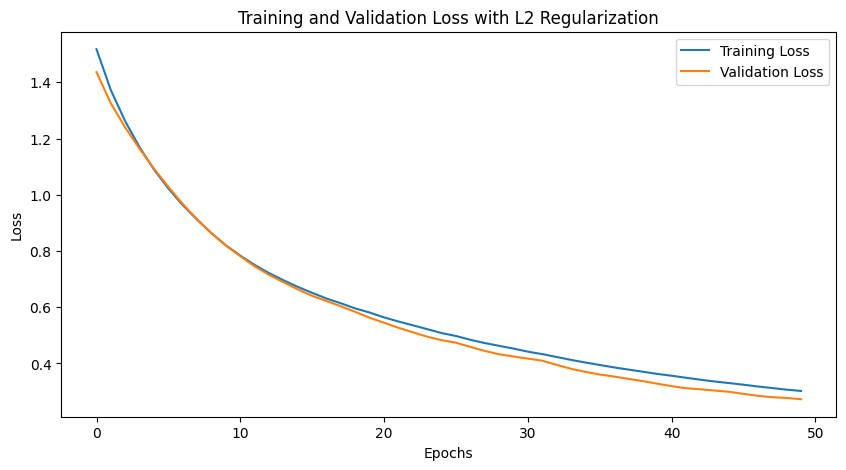

In [10]:
plot_training_history(history)